# Introduction

Predictive analytics is undertaken on the data provided after undertaking a series of data understanding, pre-processing and model selection. Data understanding is undertaken under data preparation to get a clear picture with regard to statistical data summaries, missing entries in the data, duplicate row data. The imperfections noted are handled through the pre-processing of the data and put in consideration in the assessment of variables viable for predictive task. The main predictive task to be undertaken is classification, with the dependent variable a multi-label. Three classification models, the k-NN, Naïve Bayes, and the Decision Trees are used to train the data, fine-tuned to attain the best parameters to attain models better suited at prediction tasks on the train data. The two best models based on their performances are used to predict the test data provided. All steps are backed by concrete explanations with regard to the choice.

# Methodology

The data preparation section handles the identifying and removal of irrelevant attributes, detecting and handling of missing entries, duplicates in the instances and attributes, the selection of suitable data types for attributes and data transformation whenever required.

## Data

### Data Description

The data stored within a SQLite file is imported into the workspace and the first few rows explored.

In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect("Assignment2021.sqlite")
dataset = pd.read_sql_query("SELECT * from data", cnx)
cnx.close()

In [4]:
# First 5 rows
dataset.head()

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,...,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
0,0,5.287197,GHKA,-39922,6.355759,0.322712,-335.710367,-3344,-177.869991,YIFL,...,1,1729,0,0.476141,-2.852193,7.835198,-96.461771,2.571738,YLWZ,2.0
1,1,7.359355,BYUB,-58208,-1.038145,-13.444002,-13.269634,10764,-7.030673,YIFL,...,1,-1375,0,1.489206,7.443108,-1.392234,3.924238,-2.046221,OQDJ,1.0
2,2,0.180267,UKEV,-54723,-0.472630,0.430519,209.756774,8751,111.135786,YIFL,...,1,-237,0,1.387899,-8.128869,1.894883,42.619242,-0.353631,YLWZ,2.0
3,3,5.057138,LLTF,37087,-1.922072,4.437176,-73.948010,9395,-39.179999,HFTX,...,0,4169,1,2.522532,-11.944330,0.398884,80.423726,6.202030,YLWZ,1.0
4,4,2.177483,LWYW,-68418,2.853903,-6.030091,92.902052,-9034,49.222451,YIFL,...,0,2731,0,0.934553,3.970141,-2.798476,155.302128,4.062378,OELG,2.0


The dataset comprises of 1200 observations with 32 attributes. The Table 1 Data Types and Summary Statistics provides the summary statistics of numeric data columns, for which we can note the diverse ranges on the data variables and the count of non-null values within all columns.

A better understanding of the data structure, description with regard to the variable types and summary statistics are undertaken.The data comprices of numeric and categorical data types.

In [5]:
dataset.shape

(1200, 32)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1200 non-null   int64  
 1   Att00   1191 non-null   float64
 2   Att01   1200 non-null   object 
 3   Att02   1200 non-null   int64  
 4   Att03   1200 non-null   float64
 5   Att04   1200 non-null   float64
 6   Att05   1200 non-null   float64
 7   Att06   1200 non-null   int64  
 8   Att07   1200 non-null   float64
 9   Att08   1200 non-null   object 
 10  Att09   619 non-null    float64
 11  Att10   1200 non-null   float64
 12  Att11   1200 non-null   float64
 13  Att12   1200 non-null   float64
 14  Att13   1200 non-null   float64
 15  Att14   1200 non-null   float64
 16  Att15   1200 non-null   float64
 17  Att16   1200 non-null   float64
 18  Att17   1200 non-null   float64
 19  Att18   1200 non-null   float64
 20  Att19   1200 non-null   float64
 21  Att20   1200 non-null   float64
 22  

Missing data in the class column is due to the said observations being part of the test data used in the predictive tasks. The Att00 has 9 missing data points and Att09 has 581 missing data points. The missing data points will be handled in the pre-processing phase. A check on the duplicated observations within the data shows that there are no duplicated observations in the data.

In [7]:
dataset.describe()

,index,Att00,Att02,Att03,Att04,Att05,Att06,Att07,Att09,Att10,...,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,class
count,1200.000000,1191.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,619.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1000.000000
mean,599.500000,1.606569,-12175.998333,0.639387,1.772553,-79.439103,-122.075000,-42.089354,0.057382,62.063112,...,4.614506,0.488333,-368.534167,0.515833,1.518331,2.382607,0.131220,21.821867,-0.548260,1.297000
std,346.554469,3.434696,47228.950295,2.574271,15.938925,173.087972,5354.165561,91.707493,3.631853,132.217122,...,2.667519,0.500072,2584.726635,0.499958,0.877706,9.675472,3.202912,68.809709,3.844977,0.781922
min,0.000000,-12.272134,-161331.000000,-5.882087,-61.457430,-666.679447,-20126.000000,-353.227898,-10.758332,-473.289615,...,0.000000,0.000000,-6940.000000,0.000000,0.000000,-28.112520,-10.761918,-196.774837,-10.322514,0.000000
25%,299.750000,-0.661297,-41743.000000,-1.084786,-8.719102,-200.981336,-3518.750000,-106.486281,-2.540842,-25.468032,...,2.307253,0.000000,-2158.750000,0.000000,0.759166,-3.597412,-2.040810,-22.754496,-3.211332,1.000000
50%,599.500000,1.663014,-11304.500000,0.558202,2.463898,-87.374565,-243.500000,-46.293813,0.104200,63.534198,...,4.614506,0.000000,-529.500000,1.000000,1.518331,2.555237,0.114347,22.767702,-0.788438,1.000000
75%,899.250000,3.895994,16961.750000,2.379273,12.943518,32.744471,3385.000000,17.349058,2.564323,150.078262,...,6.921758,1.000000,1051.000000,1.000000,2.277497,8.763264,2.234868,68.752101,1.563436,2.000000
max,1199.000000,13.341242,160525.000000,10.583591,51.778870,488.787908,18463.000000,258.975324,10.540950,514.521051,...,9.229011,1.000000,9200.000000,1.000000,3.036663,32.266739,10.060685,272.678927,13.683698,2.000000


The count of missing data per feature are as below.

In [8]:
#Missing Data Points
dataset.isnull().sum()

index      0
Att00      9
Att01      0
Att02      0
Att03      0
Att04      0
Att05      0
Att06      0
Att07      0
Att08      0
Att09    581
Att10      0
Att11      0
Att12      0
Att13      0
Att14      0
Att15      0
Att16      0
Att17      0
Att18      0
Att19      0
Att20      0
Att21      0
Att22      0
Att23      0
Att24      0
Att25      0
Att26      0
Att27      0
Att28      0
Att29      0
class    200
dtype: int64

Unique values per feature

In [9]:
dataset.nunique()

index    1200
Att00    1171
Att01      10
Att02    1179
Att03    1180
Att04    1180
Att05    1180
Att06    1149
Att07    1180
Att08       3
Att09     615
Att10    1180
Att11    1180
Att12    1180
Att13    1200
Att14    1180
Att15    1180
Att16    1180
Att17    1180
Att18    1180
Att19    1180
Att20    1200
Att21       2
Att22    1100
Att23       2
Att24    1200
Att25    1180
Att26    1180
Att27    1180
Att28    1180
Att29       7
class       3
dtype: int64

Check duplicated observations within the data. There are no duplicated observations in the data.

In [10]:
duplicate_values = dataset.duplicated()
print(dataset[duplicate_values])

Empty DataFrame
Columns: [index, Att00, Att01, Att02, Att03, Att04, Att05, Att06, Att07, Att08, Att09, Att10, Att11, Att12, Att13, Att14, Att15, Att16, Att17, Att18, Att19, Att20, Att21, Att22, Att23, Att24, Att25, Att26, Att27, Att28, Att29, class]
Index: []

[0 rows x 32 columns]


Categorical column count

In [11]:
dataset['Att01'].value_counts()

Att01
LWYW    318
OSUG    282
BYUB    248
UKEV    132
LLTF    120
GHKA     53
SCIJ     36
UJJW      5
ACKH      5
TRRP      1
Name: count, dtype: int64

In [12]:
dataset['Att08'].value_counts()

Att08
YIFL    799
HFTX    400
VEVT      1
Name: count, dtype: int64

In [13]:
dataset['Att29'].value_counts()

Att29
OQDJ    429
YLWZ    391
TOYT    205
HUUV    136
FLJD     25
OELG     13
PJIY      1
Name: count, dtype: int64

In [14]:
dataset['class'].value_counts()

class
2.0    498
1.0    301
0.0    201
Name: count, dtype: int64

### Correlation

Check the correlation between features.

Correlation analysis is conducted on the data to ascertain the linear relation between the attributes and is depicted in the Figure Correlation Plot where there was a fairly a strong correlation between the variables:

In [15]:
dataset_1 = dataset.copy()

In [16]:
# numeric columns
columns_num = dataset_1.select_dtypes(include=np.number).columns.tolist()[:-1]
new_data = dataset_1[columns_num[1:]].copy()

In [17]:
from sklearn import preprocessing

scaler_var = preprocessing.MinMaxScaler()
new_data_norm = scaler_var.fit_transform(new_data)
new_data_norm = pd.DataFrame(new_data_norm)
new_data_norm.columns = new_data.columns

In [18]:
pd.DataFrame(new_data_norm).corr().style.background_gradient(cmap='coolwarm')

,Att00,Att02,Att03,Att04,Att05,Att06,Att07,Att09,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28
Att00,1.000000,-0.112725,0.034702,-0.128214,-0.033362,0.010252,-0.033362,0.004615,1.000000,-0.128214,0.031335,-0.031535,-0.085083,0.268379,0.253580,0.044821,0.034702,0.057843,-0.001067,0.021079,-0.140116,0.082866,0.067470,-0.113806,-0.067165,-0.167065,-0.140115
Att02,-0.112725,1.000000,0.031423,0.390760,-0.062855,0.017596,-0.062855,-0.047234,-0.111824,0.390760,0.282306,0.027904,-0.058884,-0.475647,0.072550,-0.028237,0.031423,0.004327,-0.036921,-0.032674,0.248644,-0.016488,0.483417,-0.351804,-0.432517,-0.435089,0.248644
Att03,0.034702,0.031423,1.000000,-0.081717,-0.125115,0.019050,-0.125115,0.029776,0.034770,-0.081717,0.038220,-0.033722,0.166347,0.400352,0.192635,0.011811,1.000000,0.018133,-0.014416,-0.028579,0.171636,-0.290675,-0.146188,-0.057302,-0.012103,-0.059329,0.171632
Att04,-0.128214,0.390760,-0.081717,1.000000,-0.074917,-0.034908,-0.074917,-0.023639,-0.127627,1.000000,-0.056376,0.006791,0.072719,-0.499656,-0.332110,0.028610,-0.081717,-0.021778,0.025838,0.005730,0.167501,-0.024228,0.156267,0.097176,0.018639,-0.014818,0.167508
Att05,-0.033362,-0.062855,-0.125115,-0.074917,1.000000,-0.013676,1.000000,-0.013993,-0.035934,-0.074917,0.057578,0.049518,0.055046,-0.191253,0.113436,-0.015704,-0.125115,0.018095,0.023981,-0.060733,0.206805,-0.277965,0.031279,-0.143951,0.015940,0.092620,0.206803
Att06,0.010252,0.017596,0.019050,-0.034908,-0.013676,1.000000,-0.013676,0.018683,0.009425,-0.034908,-0.018117,0.039172,0.048794,0.017144,0.039425,-0.023782,0.019050,0.025612,0.027873,0.002298,-0.016454,-0.010726,-0.000396,-0.010684,-0.014494,-0.025517,-0.016450
Att07,-0.033362,-0.062855,-0.125115,-0.074917,1.000000,-0.013676,1.000000,-0.013993,-0.035934,-0.074917,0.057578,0.049518,0.055046,-0.191253,0.113436,-0.015704,-0.125115,0.018095,0.023981,-0.060733,0.206805,-0.277965,0.031279,-0.143951,0.015940,0.092620,0.206803
Att09,0.004615,-0.047234,0.029776,-0.023639,-0.013993,0.018683,-0.013993,1.000000,0.004688,-0.023639,-0.008329,-0.020114,-0.008377,0.024025,0.045575,0.105414,0.029776,0.008806,-0.013505,-0.039065,0.006160,0.001599,-0.030727,-0.030064,0.072485,-0.007781,0.006159
Att10,1.000000,-0.111824,0.034770,-0.127627,-0.035934,0.009425,-0.035934,0.004688,1.000000,-0.127627,0.031837,-0.030360,-0.084188,0.269177,0.253179,0.045690,0.034770,0.057966,-0.002196,0.020780,-0.140996,0.081240,0.065176,-0.111505,-0.067106,-0.169056,-0.140996
Att11,-0.128214,0.390760,-0.081717,1.000000,-0.074917,-0.034908,-0.074917,-0.023639,-0.127627,1.000000,-0.056376,0.006791,0.072719,-0.499656,-0.332110,0.028610,-0.081717,-0.021778,0.025838,0.005730,0.167501,-0.024228,0.156267,0.097176,0.018639,-0.014818,0.167508


<Axes: >

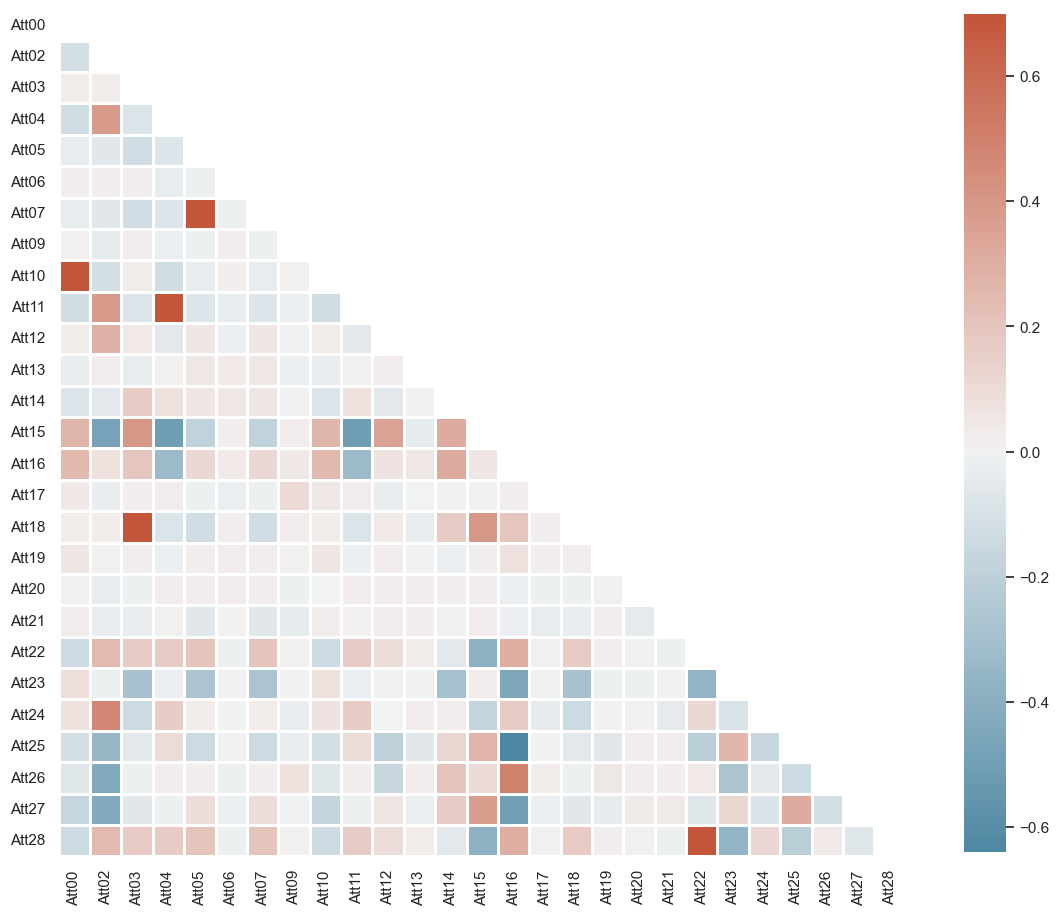

In [19]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = pd.DataFrame(new_data_norm).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot_corr = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .99})
ax.figure.savefig("attribute_corr.png")
sns_plot_corr

<Axes: xlabel='class', ylabel='count'>

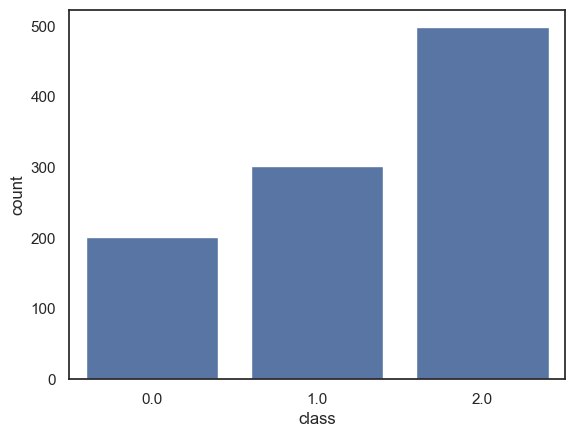

In [20]:
# get the distribution of the target variable
# Set up the matplotlib figure
f, ax = plt.subplots()
sns_plot_class = sns.countplot(x="class", data = dataset_1)
ax.figure.savefig("sns_plot_class.png")
sns_plot_class

### Missing Data and Data Transformation

Data transformation in preparation for the classification tasks involved creating of dummy variables for the categorical variables Att01, Att08 and Att29. The creating of dummy variables was based on the fact that categorical data requires transformation to numeric for ease of handling by the classification models. The columns whose missing values percentage are way above 40% are excluded from the data, for which drops feature Att09. Similarly, missing data points in Att00 are filled with mean of the column due to the negligible missing 9 data points as opposed to Att09’s 581 missing data points. 
Transformation of the data through scaling was undertaken for the k-NN and Decision Tree models, while the Naïve Bayes model was carried out with the non-transformed data. Naïve Bayes classifier transformation of data was not carried out due to the need for both positive and negative values for the model to be able to perform better on the training data.

The data was scaled, given the varying ranges and skewness observed in the data description section, and also based on the assumption that the attributes of the data may be in units of varying scales. The normalization of each of the numeric attribute with the exception of the binary attribute was undertaken with the help of the min-max scaler whose formula is as shown below:

X_std  =((X-X.min⁡(axis=0) ))/((X.max⁡(axis=0)-X.min⁡(axis=0) ) )

X_scaled=X_std × (max-min)+min

Where the min, max = feature_range.

## Data Classification

### Train-Test Split

The data was split into train and test data, with the train data covering the first 1000 instance and the test data covering the last 200 instances. The split was conducted manually through indexing. 

Classification was conducted after the selection of the train and test data sets. The models were fine-tuned to increase model accuracy. Classifiers used in the model are the k-NN, Naive Bayes, and Decision Trees. Cross validation was incorporated into the hyper parameter tuning and modelling to improve on the training accuracy of the models.

### KNN

In [21]:
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
####
from sklearn.model_selection import cross_val_predict
import sklearn.model_selection as model_selection

The k-nearest neighbors (KNN) classifier model takes a positive integer K, for which it is to identify K points closest to a test observation x_0 after which it estimates the conditional probability of a given class within the list of classes based on the frequency of the class and takes advantage of Bayes rule to classify the x_0 observation to a class that attains the highest conditional probability.
Pr⁡〖(Y=j| X=x_0 )= 1/K _(i ∈N_0 ) I (y_i=j)〗
Where N_0 are K points closest to x_0 and j is a class within the dependent variables.


##### Hyperparameter Tuning

The Exhaustive Grid Search technique for hyperparameter optimization was used. The exhaustive grid search takes in various hyperparameters that are desired and tries every single possible combination within the hyperparameters provided while also undertaking cross-validations on the data. The output of the exhaustive grid search is the best hyperparameter values to input into the model. However, in the interest of time, the most basic input are included in the hyperparameters of KNN.

Parameter used herein for the KNN are:
1.	n_neighbors: The best k based on the computed values.
2.	weights: The parameter checks whether the addition of weights to the instances improves model accuracy or not, with the 'uniform' assigning no weights, while 'distance' weighs points based on the inverse of the distance between them which implies that the nearer points will have more weight compared to those points farther.
3.	metric: is the metric used in calculating the similarity.


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Feature Selection
dataset_2 = pd.get_dummies(dataset,columns=["Att01","Att08","Att29"])
dataset_2.shape
dataset_2 = dataset_2.loc[:, dataset_2.isnull().mean() < .4]
#dataset_2.shape
# Fill na with mean Attr00
dataset_2['Att00'] = dataset_2['Att00'].fillna(dataset_2['Att00'].mean())
# Standardize
dataset_2.iloc[:, 1:27] = MinMaxScaler().fit_transform(dataset_2.iloc[:, 1:27])

In [23]:
# split the dataset into train and test sets
train_data = dataset_2.iloc[0:1000,:]
test_data = dataset_2.iloc[1000:1200,:]
train_data = train_data.drop(['index'], axis=1)
test_data = test_data.drop(['index'], axis=1)
#
X_train = train_data.copy()
X_test = test_data.copy()
#
y_train = train_data.copy()
y_test = test_data.copy()
#
X_train = X_train.drop(['class'],axis=1)
X_test = X_test.drop(['class'],axis=1)

y_train = y_train['class']
y_test = y_test['class']
#
print(train_data.shape)
print(test_data.shape)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

(1000, 47)
(200, 47)
Training set shape:  (1000, 46) (1000,)
Testing set shape:  (200, 46) (200,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

Hyperparameter Tuning

In [25]:
grid_params_knn = { 'n_neighbors' : [2,3,5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [26]:
gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params_knn, verbose = 1, cv=3, n_jobs = -1)

In [27]:
# fit the model on our train set
g_res_knn = gs_knn.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [28]:
# get the hyperparameters with the best score
g_res_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

The hyper-parameters that provide the best models were 5 n_neighbors, manhattan metric and distance weights. The model provided an accuracy of 100% on the training data set.

In [29]:
# use the best hyperparameters
knn_knn = KNeighborsClassifier(**g_res_knn.best_params_)
#n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [30]:
# get a prediction
y_hat_knn = knn_knn.predict(X_train)

In [31]:
accuracy_knn_1 = metrics.accuracy_score(y_train, y_hat_knn)
print('knn: Training set accuracy: ', accuracy_knn_1)

knn: Training set accuracy:  1.0


In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_train, y_hat_knn)
print(cm_knn)

[[201   0   0]
 [  0 301   0]
 [  0   0 498]]


In [33]:
#finding accuracy from the confusion matrix.
a_knn = cm_knn.shape
corrPred = 0
falsePred = 0

for row in range(a_knn[0]):
    for c in range(a_knn[1]):
        if row == c:
            corrPred +=cm_knn[row,c]
        else:
            falsePred += cm_knn[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the knn Clasification is: ', corrPred/(cm_knn.sum()))

Correct predictions:  1000
False predictions 0


Accuracy of the knn Clasification is:  1.0


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_hat_knn, target_names = ['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       301
           2       1.00      1.00      1.00       498

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



Prediction based on KNN

In [35]:
y_knn = knn_knn.predict(X_test)

### Decision Trees

Decision trees predict that each instance of test data falls into the most commonly occurring class of the training instances in the region to which it belongs. Either of the Gini index or the entropy, both of which are sensitive to the purity of the node, simply referred to as the classification error rate can be used to offer evaluation of a splits within the decision trees. For the purposes of prediction accuracy, the classification rate is used in the pruning of the classification trees.

In [36]:
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import sklearn.model_selection as model_selection

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params_dt = [{'criterion':["gini", "entropy"],
          'max_depth': list(range(2, 20)),'max_leaf_nodes': list(range(2, 50))}]
grid_search_cv_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42), params_dt, verbose=1, cv=3, 
    n_jobs=-1, scoring = "accuracy")
grid_search_cv_dt.fit(X_train, y_train)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29, 30,
                                             31, ...]}],
             scoring='accuracy', verbose=1)

In [38]:
grid_search_cv_dt.best_estimator_

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=22, random_state=42)

The best hyper parameters for the Decision Tree model were at max_depth of 9, max_leaf of 22 and random state of 42. 

In [39]:
#Decision Trees
dtree = tree.DecisionTreeClassifier(max_depth=9, max_leaf_nodes=22, random_state=42)
dtree.fit(X_train, y_train)
Y_pred_dt = cross_val_predict(dtree, X_train, y_train, cv = 3)

In [40]:
accur_dt = metrics.accuracy_score(y_train, Y_pred_dt)
print('Decision Tree: Training set accuracy: ', accur_dt)

Decision Tree: Training set accuracy:  0.709


The model provided an accuracy of 70.9% on the training data set.

In [41]:
cm_dt = confusion_matrix(y_train, Y_pred_dt)
print(cm_dt)

[[ 99  41  61]
 [ 33 193  75]
 [ 36  45 417]]


In [42]:
#finding accuracy from the confusion matrix.
a_dt = cm_dt.shape
corrPred = 0
falsePred = 0

for row in range(a_dt[0]):
    for c in range(a_dt[1]):
        if row == c:
            corrPred +=cm_dt[row,c]
        else:
            falsePred += cm_dt[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Decision Tree Clasification is: ', corrPred/(cm_dt.sum()))

Correct predictions:  709
False predictions 291


Accuracy of the Decision Tree Clasification is:  0.709


In [43]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_train, Y_pred_dt, target_names = ['0','1','2']))

              precision    recall  f1-score   support

           0       0.59      0.49      0.54       201
           1       0.69      0.64      0.67       301
           2       0.75      0.84      0.79       498

    accuracy                           0.71      1000
   macro avg       0.68      0.66      0.67      1000
weighted avg       0.70      0.71      0.70      1000



Prediction based on Decision tree on the test data

In [44]:
y_dtree = dtree.predict(X_test)

### NAIVE

The naive Bayes classifier works by finding instances of similar attribute class, learns of the classes in the dependent categorical variable for each of the instances and builds upon the most frequent to predict class for new test data. The classifier gives the probability of belonging to any of the available classes after which cutoff probability is used in the assigning of observations to new test data instances. There isn't a hyper-parameter to tune with the Naive Bayes as such, no grid search over was undertaken.

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Feature Selection
dataset_2 = pd.get_dummies(dataset,columns=["Att01","Att08","Att29"])
dataset_2.shape
dataset_2 = dataset_2.loc[:, dataset_2.isnull().mean() < .4]
dataset_2.shape
# Fill na with mean
dataset_2['Att00'] = dataset_2['Att00'].fillna(dataset_2['Att00'].mean())
# No Standardization
#dataset_2.iloc[:, 1:27] = MinMaxScaler().fit_transform(dataset_2.iloc[:, 1:27])

In [46]:
# split the dataset into train and test sets
train_data = dataset_2.iloc[0:1000,:]
test_data = dataset_2.iloc[1000:1200,:]
train_data = train_data.drop(['index'], axis=1)
test_data = test_data.drop(['index'], axis=1)
#
X_train = train_data.copy()
X_test = test_data.copy()
#
y_train = train_data.copy()
y_test = test_data.copy()
#
X_train = X_train.drop(['class'],axis=1)
X_test = X_test.drop(['class'],axis=1)

y_train = y_train['class']
y_test = y_test['class']
#
print(train_data.shape)
print(test_data.shape)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

(1000, 47)
(200, 47)
Training set shape:  (1000, 46) (1000,)
Testing set shape:  (200, 46) (200,)


There isn't a hyper-parameter to tune with the naive bayes as such, no grid search over was undertaken.

In [47]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [48]:
# Predicting the Test set results
y_pred_nv = nvclassifier.predict(X_train)

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nv = confusion_matrix(y_train, y_pred_nv)
print(cm_nv)

[[113  33  55]
 [ 41 167  93]
 [ 18  56 424]]


In [50]:
#finding accuracy from the confusion matrix.
a_nv = cm_nv.shape
corrPred = 0
falsePred = 0

for row in range(a_nv[0]):
    for c in range(a_nv[1]):
        if row == c:
            corrPred +=cm_nv[row,c]
        else:
            falsePred += cm_nv[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm_nv.sum()))

Correct predictions:  704
False predictions 296


Accuracy of the Naive Bayes Clasification is:  0.704


The model provided an accuracy of 70.4% on the training data set.

In [51]:
accur_nv =  metrics.accuracy_score(y_train, y_pred_nv)
print('NB: Training set accuracy: ',accur_nv)

NB: Training set accuracy:  0.704


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_nv, target_names = ['0','1','2']))

              precision    recall  f1-score   support

           0       0.66      0.56      0.61       201
           1       0.65      0.55      0.60       301
           2       0.74      0.85      0.79       498

    accuracy                           0.70      1000
   macro avg       0.68      0.66      0.67      1000
weighted avg       0.70      0.70      0.70      1000



Prediction based on Naive Bayes on the test data

In [53]:
y_nvclassifier = nvclassifier.predict(X_test)

# Results and Conclusion

## Model Comparison and Prediction

Model comparisons were made based on the accuracy, for which the best 2 models were selected for the purpose of predicting class labels for the 200 instances in the test data. The knn training set accuracy was at 100%, Decision Tree Classification at 70.9% and Naïve Bayes training set accuracy at 70.4%.

## Prediction

The models selected for the prediction task were the knn and Decision Tree Classification. The predictions were derived from the models attained in the classification section applied on the test data created in the data preparation stage. Predictions were made on the previously partitioned test data of the dataset based on models used to fit the train data with the tuned parameters.

The predicted class labels from the best 2 models, the KNN and the Decision Tree that were selected solely based on the accuracy score from fitting on the training data. The predicted variables were converted into type integer, concatenated into a data frame. The results saved in the Answers.sqlite file with the three columns, ID, Predict1 of the KNN model and Predict2 of the Decision Tree model.

Further assessment can be made to include more parameters in the tuning phase as well as extend comparisons of model effectiveness beyond only accuracy measures.

In [54]:
# Based on accuracy
# k-NN
# Decision Tree

In [55]:
all_predictions = pd.DataFrame({'pred1':y_knn,'pred2':y_nvclassifier,'pred3':y_dtree})

In [56]:
index = dataset_2.iloc[1000:1200,0]
Answers = pd.DataFrame({'ID': index, 'Predict1':y_knn.astype(int), 'Predict2': y_dtree.astype(int)})
Answers.to_csv('Answers.csv', index=False)

In [57]:
Answers.head(10)

,ID,Predict1,Predict2
1000,1000,2,2
1001,1001,1,0
1002,1002,2,2
1003,1003,2,2
1004,1004,2,2
1005,1005,2,2
1006,1006,1,1
1007,1007,2,2
1008,1008,2,2
1009,1009,2,2


In [58]:
# save to Answer.sqlite
from sqlalchemy import create_engine
disk_engine = create_engine('sqlite:///Answers.sqlite')
Answers.to_sql('Answers', disk_engine, if_exists='fail')

200

# References

1. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). An introduction to statistical learning: With applications in R. Springer.
2. Sklearn.preprocessing.MinMaxScaler. scikit. (n.d.). Retrieved October 16, 2021, from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html.